Problem Statement

Build a machine learning model to predict whether a machine will fail soon, based on sensor readings (temperature, torque , RPM, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_excel("../data/raw/machine_data.xlsx", engine='openpyxl')



In [6]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [36]:
print(data['Target'].unique())
print(data.shape)

[0 1]
(10000, 10)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [34]:
print(data.isnull().sum())


print(data.isnull().any().any())


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
False


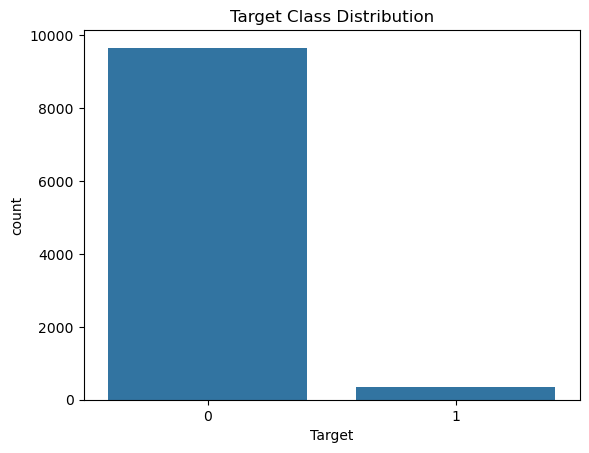

Target
0    9661
1     339
Name: count, dtype: int64


In [14]:
sns.countplot(x='Target', data=data)
plt.title('Target Class Distribution')
plt.show()

print(data['Target'].value_counts())


In [21]:
print(data['Type'].unique())

['M' 'L' 'H']


In [22]:
# Example mapping
mapping = {'H': 0, 'M': 1, 'L': 2}
data['Type'] = data['Type'].map(mapping)

# Check
print(data['Type'].value_counts())
print(data['Type'].dtype)


Type
2    6000
1    2997
0    1003
Name: count, dtype: int64
int64


In [25]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()['Target'].sort_values(ascending=False)
print(corr)

Target                     1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Type                       0.036715
Process temperature [K]    0.035946
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64


In [26]:
features = ['Torque [Nm]', 'Tool wear [min]', 'Air temperature [K]']

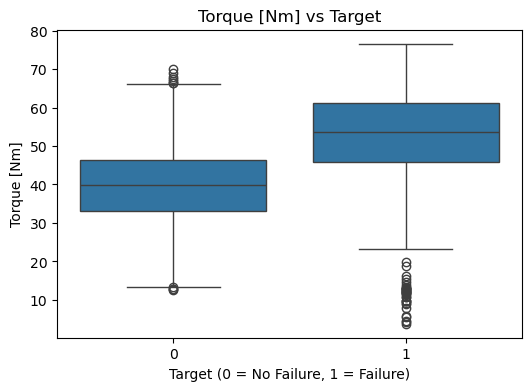

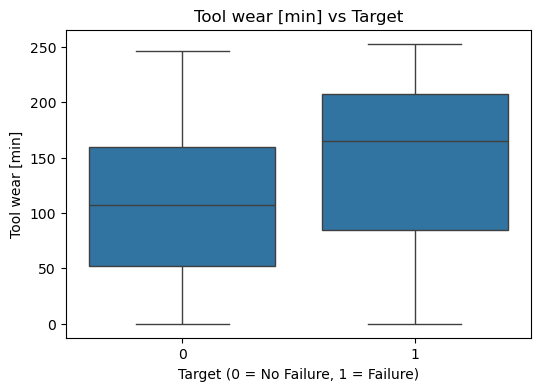

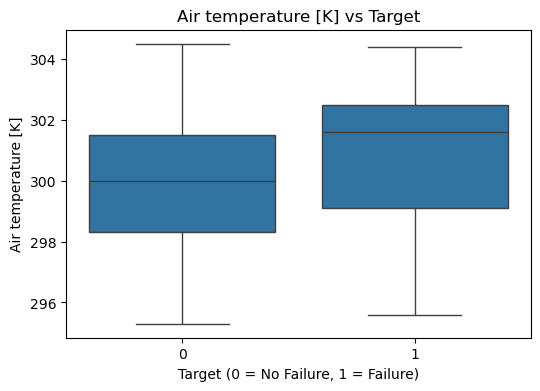

In [28]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.xlabel('Target (0 = No Failure, 1 = Failure)')
    plt.ylabel(col)


### Conclusion

#### -The dataset is highly imbalanced: very few failures compared to non-failures (~3–4% failures).

#### -Most predictive features for are:

#### -Torque [Nm]

#### -Tool wear [min]

#### -Air temperature [K]

#### -Other features like  Type, Process Temperature, Rotational Speed  have very low correlation and can be dropped for initial ML modeling.